In [1]:
import numpy as np 
import pandas as pd

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

import os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Directory setting
os.chdir(r"/Users/basilshahin/Desktop/Assignment 2") 

In [3]:
data = pd.read_csv("bank-full.csv", delimiter=';')

# Data Exploring and Preprocessing

In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

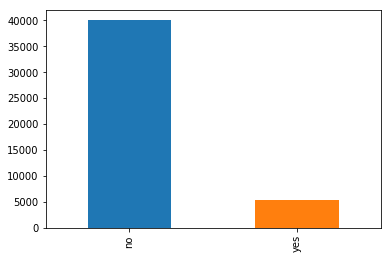

In [7]:
#class
data["y"].value_counts().plot(kind="bar")

In [8]:
unique = data.nunique()

In [9]:
unique

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [10]:
Cat_Features = unique[(unique <= 31)].index.values

In [11]:
Cat_Features

array(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'day', 'month', 'poutcome', 'y'], dtype=object)

In [12]:
Num_Features = unique[(unique > 31)].index.values

In [13]:
Num_Features

array(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous'],
      dtype=object)

In [14]:
df = data.copy()

In [15]:
for c in Cat_Features:
    df[c] = LabelEncoder().fit_transform(df[c])

In [16]:
df[Num_Features].head()

,age,balance,duration,campaign,pdays,previous
0,58,2143,261,1,-1,0
1,44,29,151,1,-1,0
2,33,2,76,1,-1,0
3,47,1506,92,1,-1,0
4,33,1,198,1,-1,0


In [17]:
for c in Num_Features:
    df[c] = StandardScaler().fit_transform(df[c].values.reshape(-1, 1))

/Users/basilshahin/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/basilshahin/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/basilshahin/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/basilshahin/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/basilshahin/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py

In [18]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.606965,4,1,2,0,0.256419,1,0,2,4,8,0.011016,-0.569351,-0.411453,-0.25194,3,0
1,0.288529,9,2,1,0,-0.437895,1,0,2,4,8,-0.416127,-0.569351,-0.411453,-0.25194,3,0
2,-0.747384,2,1,1,0,-0.446762,1,1,2,4,8,-0.707361,-0.569351,-0.411453,-0.25194,3,0
3,0.571051,1,1,3,0,0.047205,1,0,2,4,8,-0.645231,-0.569351,-0.411453,-0.25194,3,0
4,-0.747384,11,2,3,0,-0.447091,0,0,2,4,8,-0.233620,-0.569351,-0.411453,-0.25194,3,0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['y'] ,axis =1).values,
                                                    df['y'].values, test_size=0.2, random_state=42)


## Decision Tree

In [20]:
params = {'max_leaf_nodes': list(range(2, 25)), 'min_samples_split': [2, 3, 4 ,5]}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 92 candidates, totalling 276 fits


[Parallel(n_jobs=1)]: Done 276 out of 276 | elapsed:   16.4s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], 'min_samples_split': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [21]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=24,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [22]:
y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.895388698440783

In [23]:
print("F1 Macro:" , f1_score(y_test, y_pred, average='macro'))
print("F1 micro:" , f1_score(y_test, y_pred, average='micro'))
print("F1 weighted:", f1_score(y_test, y_pred, average='weighted'))
print("F1 None:", f1_score(y_test, y_pred, average=None))

F1 Macro: 0.7104655334403743
F1 micro: 0.895388698440783
F1 weighted: 0.8860235568342866
F1 None: [0.94185618 0.47907489]


In [24]:
cm = confusion_matrix(y_test, y_pred)

In [25]:
cm

array([[7662,  290],
       [ 656,  435]])

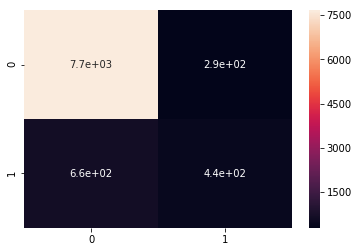

In [26]:
sns.heatmap(cm, annot=True)

## Random Forest

In [27]:
params = {'n_estimators': [40, 60],
          'min_samples_leaf': [2, 3, 5],
          'max_features' : [0.2, 0.5, 0.7]}

grid_search_cv = GridSearchCV(RandomForestClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  2.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [40, 60], 'min_samples_leaf': [2, 3, 5], 'max_features': [0.2, 0.5, 0.7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [28]:
grid_search_cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [29]:
y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.9029083268826716

In [30]:
print("F1 Macro:", f1_score(y_test, y_pred, average='macro')) 
print("F1 micro:", f1_score(y_test, y_pred, average='micro'))
print("F1 weighted:", f1_score(y_test, y_pred, average='weighted'))
print("F1 None:", f1_score(y_test, y_pred, average=None))

F1 Macro: 0.7391552916452465
F1 micro: 0.9029083268826716
F1 weighted: 0.8959605358551522
F1 None: [0.94582922 0.53248136]


In [31]:
cm = confusion_matrix(y_test, y_pred)

In [32]:
cm

array([[7665,  287],
       [ 591,  500]])

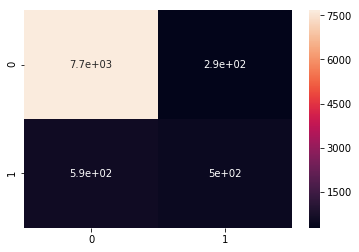

In [33]:
sns.heatmap(cm, annot=True)